# 🗓️ Lamarck 2025-12-26

In [1]:
import torch

In [2]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

掷骰子，我们只需传入一个概率向量。 输出是另一个相同长度的向量：它在索引i处的值是采样结果中i出现的次数。
这里先定义概率向量，然后抽取一次样本

In [3]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 1., 0., 0., 0., 0.])

使用深度学习框架的函数同时抽取多个样本，这里抽取十个样本。

In [4]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([4., 1., 2., 2., 1., 0.])

现在我们知道如何对骰子进行采样，我们可以模拟1000次投掷。 然后，我们可以统计1000次投掷后，每个数字被投中了多少次。 具体来说，我们计算相对频率，以作为真实概率的估计。

In [5]:
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 相对频率作为估计值

tensor([0.1530, 0.1560, 0.1650, 0.1800, 0.1740, 0.1720])

现在进行500组实验（掷骰子），每组抽取10个样本，可以看到这些概率如何随着时间的推移收敛到真实概率。

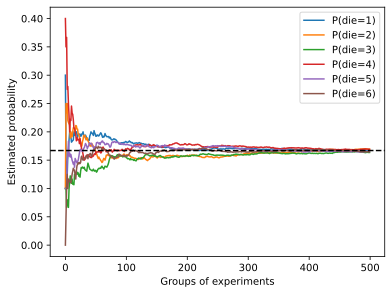

In [6]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();